In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime 


ANOVA
On effectue une analyse de variance pour mesurer l'indépendance entre une varaible qualitative et une variable quantitative
Dans notre cas, la variable quantitative est l'année, le mois ou la semaine de transaction, la variable quantitative est quant à elle tx_amount. 

In [2]:
df_A=pd.read_csv("/Users/corentinpla/Documents/C-2-Statap/transactions_A.csv")
df_B=pd.read_csv("/Users/corentinpla/Documents/C-2-Statap/transactions_B.csv")

df_A["df_type"]="A"
df_B["df_type"]="B"

In [37]:
from scipy.stats import ks_2samp

# Generate two sets of random data
data1 = df_A[df_A["tx_amount"]<1000]["tx_amount"]
data2 = df_B[df_B["tx_amount"]<1000]["tx_amount"]

# Perform the Kolmogorov-Smirnov test
stat, p = ks_2samp(data1, data2)

# Print the test statistic and p-value
print('Kolmogorov-Smirnov statistic:', stat)
print('p-value:', p)

Kolmogorov-Smirnov statistic: 0.02587617262985742
p-value: 1.0349865374012871e-167


In [38]:
from scipy.stats import anderson_ksamp
import numpy as np


# Perform the Anderson-Darling test
result = anderson_ksamp([data1, data2])

# Print the test statistic and p-value
print('Anderson-Darling statistic:', result.statistic)
print('critical values:', result.critical_values)

Anderson-Darling statistic: 263.1051697850726
critical values: [0.325 1.226 1.961 2.718 3.752 4.592 6.546]


/var/folders/54/ygl2prm92g7c7p73tl2p1y5w0000gn/T/ipykernel_10182/2291226794.py:6: UserWarning: p-value floored: true value smaller than 0.001
  result = anderson_ksamp([data1, data2])


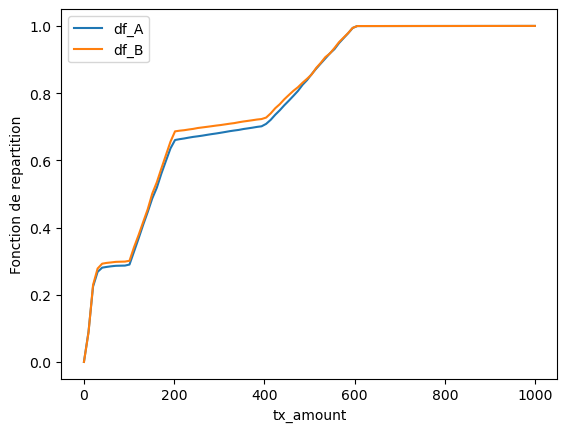

In [41]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Calculate the empirical CDFs for the two datasets
ecdf1 = sm.distributions.ECDF(data1)
ecdf2 = sm.distributions.ECDF(data2)

# Create a range of x-values to plot the CDFs
x = np.linspace(min(data1.min(), data2.min()), max(data1.max(), data2.max()), num=100)

# Plot the two CDFs on the same graph
plt.plot(x, ecdf1(x), label='df_A')
plt.plot(x, ecdf2(x), label='df_B')

# Add a legend and axis labels
plt.legend()
plt.xlabel('tx_amount')
plt.ylabel('Fonction de repartition')

# Show the plot
plt.show()

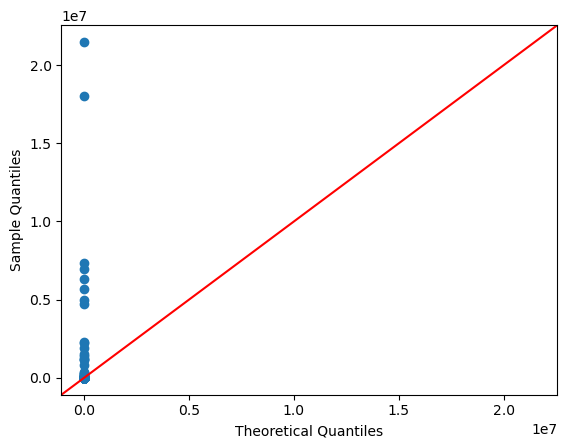

In [8]:
df_sample=df_A.sample(n=1000)
sm.qqplot(df_sample["tx_amount"], line ='45')
plt.show()

In [11]:
from scipy.stats import shapiro

In [12]:

stat, p = shapiro(df_sample["tx_amount"])
print("Shapiro-Wilk test statistics: ", stat)
print("p-value: ", p)

Shapiro-Wilk test statistics:  0.06476742029190063
p-value:  0.0


In [24]:
df_concat=pd.concat([df_A,df_B])

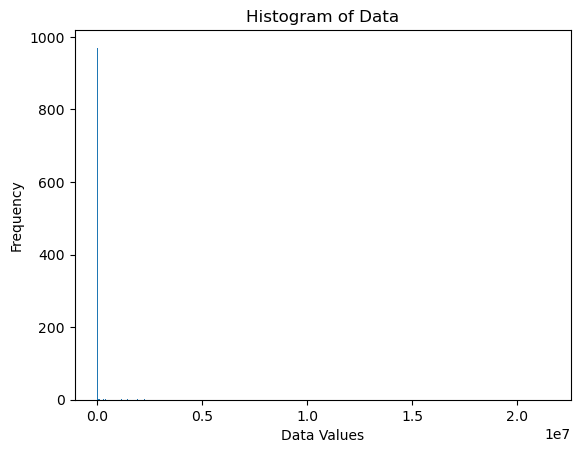

In [16]:
plt.hist(df_sample["tx_amount"], bins=1000)

# Add axis labels and a title
plt.xlabel('Data Values')
plt.ylabel('Frequency')
plt.title('Histogram of Data')

# Show the plot
plt.show()

In [28]:
df_concat.dtypes

tx_id                      int64
sender_account_id        float64
receiver_account_id      float64
tx_amount                float64
timestamp                 object
tx_type                   object
sender_bank_id            object
sender_first_name         object
sender_last_name          object
sender_country_code       object
sender_birth_date         object
sender_zip_code            int64
receiver_bank_id          object
receiver_first_name       object
receiver_last_name        object
receiver_country_code     object
receiver_birth_date       object
receiver_zip_code          int64
is_alert_solo               bool
is_alert_pooled             bool
df_type                   object
dtype: object

In [11]:
df_A["sender_country_code"].head(50)

0     FR
1     FR
2     FR
3     CN
4     FR
5     FR
6     FR
7     FR
8     FR
9     FR
10    FR
11    FR
12    FR
13    FR
14    FR
15    FR
16    FR
17    FR
18    FR
19    FR
20    FR
21    FR
22    FR
23    FR
24    FR
25    FR
26    FR
27    FR
28    FR
29    FR
30    FR
31    FR
32    FR
33    FR
34    FR
35    FR
36    FR
37    FR
38    FR
39    FR
40    FR
41    FR
42    FR
43    FR
44    FR
45    FR
46    FR
47    FR
48    FR
49    FR
Name: sender_country_code, dtype: object

In [17]:
def get_week_of_the_year(s):
    year=int(s[0:4])
    month=int(s[5:7])
    day=int(s[8:10])

    return(datetime.date(year, month, day).isocalendar().week)
    

def get_week(s):
    year=int(s[0:4])
    week=get_week_of_the_year(s)

    return((year-2018)*52+week)
    

def get_month_of_the_year(s):
    return(int(s[5:7]))
    

def get_month(s):
    month=get_month_of_the_year(s)
    year=int(s[0:4])
    
    return((year-2018)*12+month)

def get_year(s):
    year=s[:4]

    return(int(year))



In [19]:

df_A["week"]=df_A["timestamp"].apply(lambda x:get_week(x))
df_A["week_year"]=df_A["timestamp"].apply(lambda x:get_week_of_the_year(x))
df_A["month"]=df_A["timestamp"].apply(lambda x:get_month(x))
df_A["month_year"]=df_A["timestamp"].apply(lambda x:get_month_of_the_year(x))
df_A["year"]=df_A["timestamp"].apply(lambda x:get_year(x))


In [26]:
df_test=df_A.sample(n=10000)

In [33]:
df_concat["sender_country_code"].drop_duplicates()


0        FR
3        CN
139      BR
241      IN
245      TH
         ..
582      MA
2300     BG
7287     IL
8108     BI
12676    SS
Name: sender_country_code, Length: 80, dtype: object

In [ ]:
#uniquement pour graphiques
def select_sender_country_code(df):
    for x in df["sender_country_code"].drop_duplicates():
        
        
    

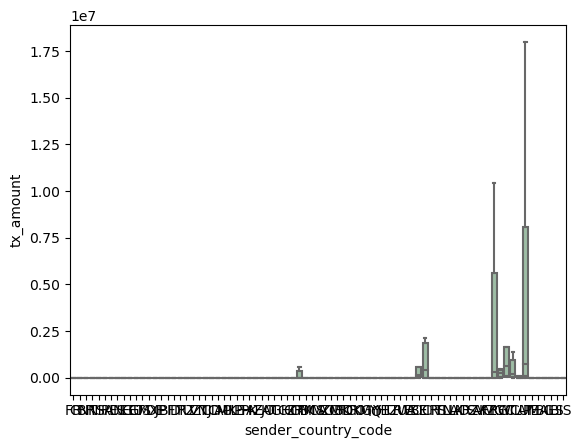

In [31]:
ax = sns.boxplot(x='sender_country_code', y='tx_amount', data=df_concat, color='#99c2a2',showfliers=False)
#ax = sns.swarmplot(x="year", y="tx_amount", data=df_test, color='#7d0013')
plt.show()

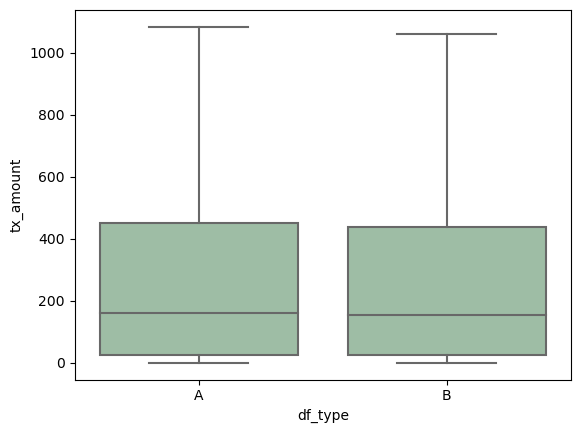

In [25]:
ax = sns.boxplot(x='df_type', y='tx_amount', data=df_concat, color='#99c2a2',showfliers=False)
#ax = sns.swarmplot(x="year", y="tx_amount", data=df_test, color='#7d0013')
plt.show()

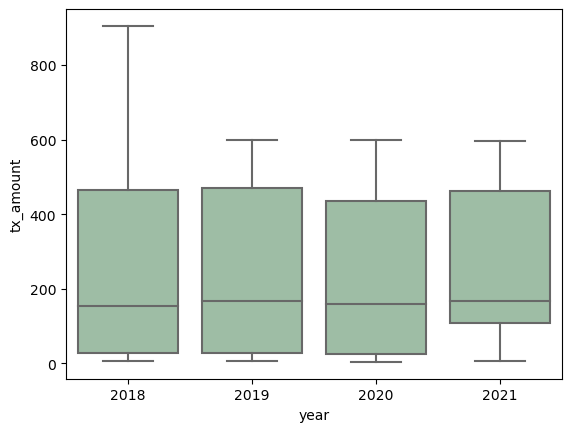

In [28]:
ax = sns.boxplot(x='year', y='tx_amount', data=df_test, color='#99c2a2',showfliers=False)
#ax = sns.swarmplot(x="year", y="tx_amount", data=df_test, color='#7d0013')
plt.show()

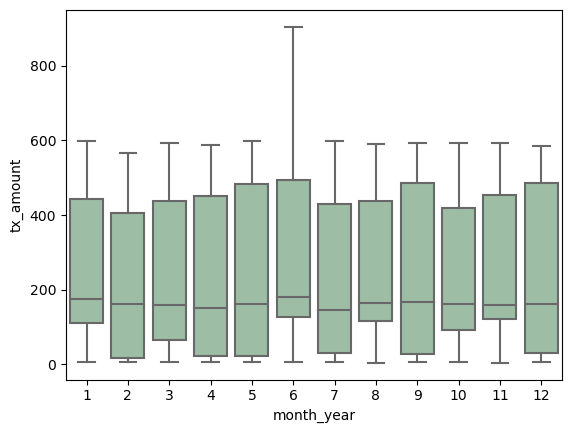

In [30]:
ax = sns.boxplot(x='month_year', y='tx_amount', data=df_test, color='#99c2a2',showfliers=False)
#ax = sns.swarmplot(x="year", y="tx_amount", data=df_test, color='#7d0013')
plt.show()

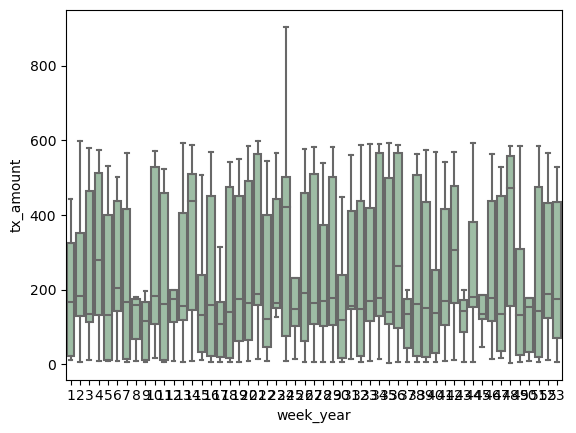

In [31]:
ax = sns.boxplot(x='week_year', y='tx_amount', data=df_test, color='#99c2a2',showfliers=False)
#ax = sns.swarmplot(x="year", y="tx_amount", data=df_test, color='#7d0013')
plt.show()

In [32]:
#year
model = ols('tx_amount ~ year',             
            data = df_test).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

                sum_sq     df          F    PR(>F)
year      4.658927e+13    1.0  14.223348  0.000172
Residual  3.268998e+15  998.0        NaN       NaN


Interprétation : on remarque que la p-valeur du test (lequel) vérifie p<0.05, on en conclu qu'il n'existe pas de  différence significative au niveau 5% entre les différentes catégories (ici les années)

In [33]:
#month
model = ols('tx_amount ~ month_year',             
            data = df_test).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

                  sum_sq     df         F    PR(>F)
month_year  3.757673e+12    1.0  1.132352  0.287532
Residual    3.311829e+15  998.0       NaN       NaN


Interprétation : on remarque que la p-valeur du test est élevée (p=0,29), on en conclu qu'il existe une différence significative au niveau 5% entre les différentes catégories (ici les mois de l'année).

In [34]:
#week
model = ols('tx_amount ~ week_year',             
            data = df_test).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

                 sum_sq     df         F    PR(>F)
week_year  2.609324e+12    1.0  0.786032  0.375516
Residual   3.312978e+15  998.0       NaN       NaN


Interprétation : on remarque que la p-valeur du test est élevée (p=0,37), on en conclu qu'il existe une différence significative au niveau 5% entre les différentes catégories (ici les semaines de l'années).

In [27]:
#Dataframes
model = ols('tx_amount ~ df_type',             
            data = df_concat).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

                sum_sq         df         F   PR(>F)
df_type   5.526092e+12        1.0  3.220762  0.07271
Residual  2.223717e+18  1296045.0       NaN      NaN


Interprétation : on remarque que la p-valeur du test est 0.072>0.05 , on en conclu qu'il existe une différence significative au niveau 5% entre les différentes catégories (ici les deux datasets).

In [30]:
model = ols('tx_amount ~ sender_country_code',             
            data = df_concat).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

                           sum_sq         df          F         PR(>F)
sender_country_code  1.373265e+15       78.0  10.266824  2.341661e-120
Residual             2.222349e+18  1295951.0        NaN            NaN
